----
# **RANDOM FOREST**
-----

### OBJECTIVE :

####  Use the Glass dataset and apply the Random forest model

### TASKS :

##### DATA PREPROCESSING :

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import resample

In [14]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [16]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [20]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [22]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


####  EXPLORATORY DATA ANALYSIS (EDA) :

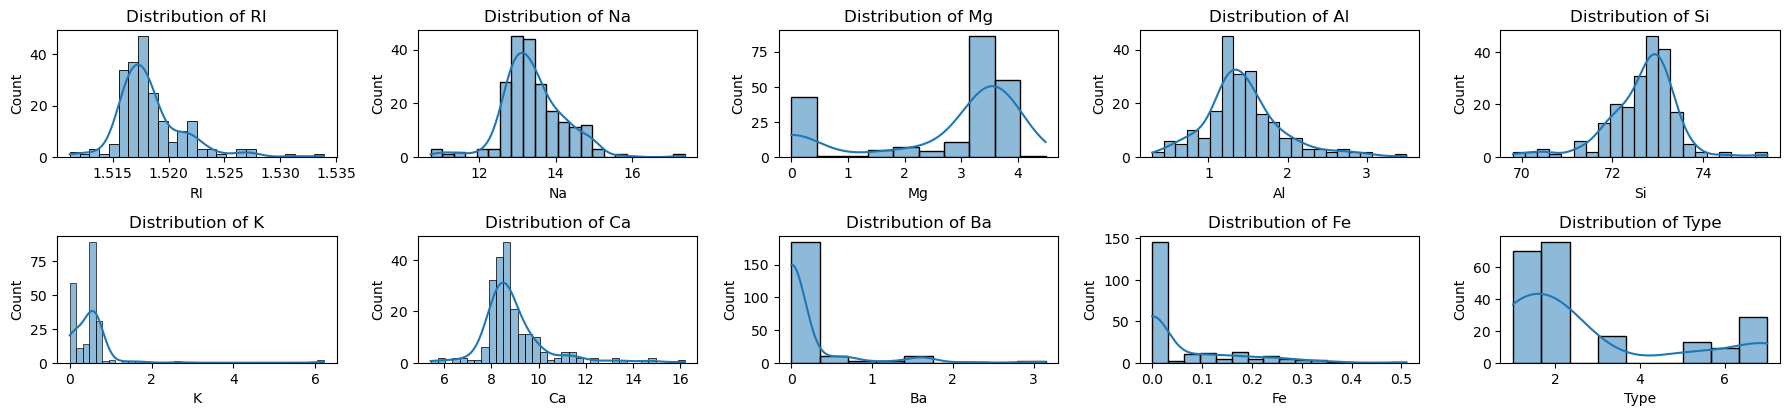

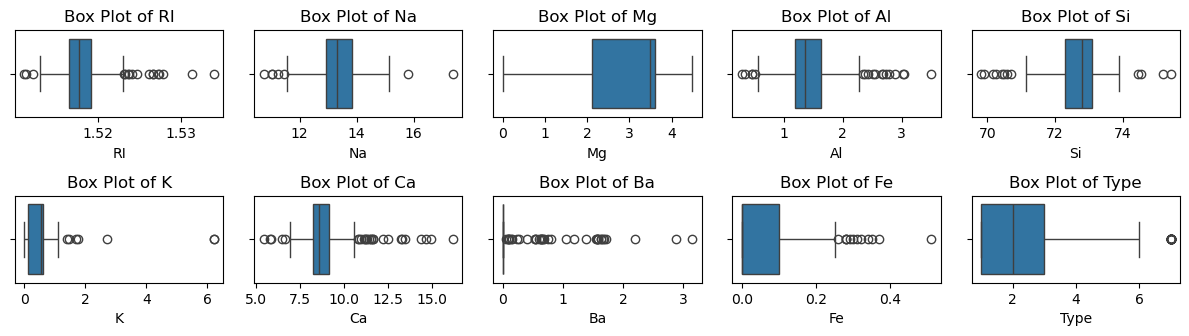

In [36]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

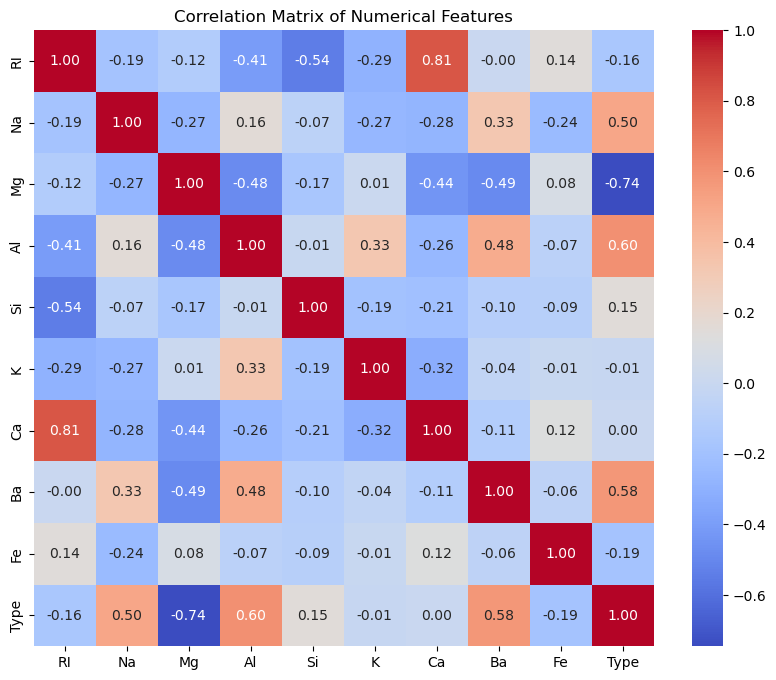

In [38]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

####  FEATURE ENGINEERING :

In [54]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance by upsampling minority classes
df = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

class_counts = y.value_counts()
majority_class = class_counts.idxmax()
df_majority = df[df['Type'] == majority_class]
df_minority_classes = [df[df['Type'] == cls] for cls in class_counts.index if cls != majority_class]



In [56]:
# Upsample minority classes
df_upsampled = [resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42) for df_minority in df_minority_classes]
df_balanced = pd.concat([df_majority] + df_upsampled)

# Separate balanced features and target
X_balanced = df_balanced.drop(columns=['Type'])
y_balanced = df_balanced['Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)



####  RANDOM FOREST CLASSIFICATION :

In [61]:
# Initialize and train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_report = classification_report(y_test, y_pred_rf)



#### BAGGING ANDD BOOSTING :

In [63]:
# Bagging with Random Forest
bagging_clf = BaggingClassifier(RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

# Boosting with AdaBoost - corrected without base_estimator
boosting_clf = AdaBoostClassifier(n_estimators=10, random_state=42)  # Now using default base learner
boosting_clf.fit(X_train, y_train)
y_pred_boosting = boosting_clf.predict(X_test)



In [65]:
# Evaluate Bagging and Boosting
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
bagging_precision = precision_score(y_test, y_pred_bagging, average='weighted')
bagging_recall = recall_score(y_test, y_pred_bagging, average='weighted')
bagging_f1 = f1_score(y_test, y_pred_bagging, average='weighted')
bagging_report = classification_report(y_test, y_pred_bagging)

boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
boosting_precision = precision_score(y_test, y_pred_boosting, average='weighted')
boosting_recall = recall_score(y_test, y_pred_boosting, average='weighted')
boosting_f1 = f1_score(y_test, y_pred_boosting, average='weighted')
boosting_report = classification_report(y_test, y_pred_boosting)

# Results
rf_results = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1,
    "Classification Report": rf_report
}

bagging_results = {
    "Accuracy": bagging_accuracy,
    "Precision": bagging_precision,
    "Recall": bagging_recall,
    "F1 Score": bagging_f1,
    "Classification Report": bagging_report
}

boosting_results = {
    "Accuracy": boosting_accuracy,
    "Precision": boosting_precision,
    "Recall": boosting_recall,
    "F1 Score": boosting_f1,
    "Classification Report": boosting_report
}

rf_results, bagging_results, boosting_results

({'Accuracy': 0.8978102189781022,
  'Precision': 0.9023015740111399,
  'Recall': 0.8978102189781022,
  'F1 Score': 0.8943143385180314,
  'Classification Report': '              precision    recall  f1-score   support\n\n           1       0.79      0.68      0.73        22\n           2       1.00      0.74      0.85        23\n           3       0.88      1.00      0.94        23\n           5       0.92      1.00      0.96        23\n           6       1.00      1.00      1.00        23\n           7       0.81      0.96      0.88        23\n\n    accuracy                           0.90       137\n   macro avg       0.90      0.90      0.89       137\nweighted avg       0.90      0.90      0.89       137\n'},
 {'Accuracy': 0.8686131386861314,
  'Precision': 0.8772919767445315,
  'Recall': 0.8686131386861314,
  'F1 Score': 0.8605420444355731,
  'Classification Report': '              precision    recall  f1-score   support\n\n           1       0.71      0.68      0.70        22\n    

------

### Key Features:
---------

### Model Evaluation Metrics

1. **Accuracy**:
   - This is the proportion of all predictions (both true positives and true negatives) that were correct. 
   - **Model 1**: 89.78%
   - **Model 2**: 86.86%
   - **Model 3**: 29.93%

2. **Precision**:
   - Precision indicates the proportion of positive identifications that were actually correct. High precision means that the classifier has a low false-positive rate.
   - **Model 1**: 90.23%
   - **Model 2**: 87.73%
   - **Model 3**: 17.05%

3. **Recall** (Sensitivity):
   - Recall measures the ability of a model to find all the relevant cases (true positives). It reflects how many actual positives were identified.
   - **Model 1**: 89.78%
   - **Model 2**: 86.86%
   - **Model 3**: 29.93%

4. **F1 Score**:
   - The F1 Score is a harmonic mean of precision and recall. It provides a balance between false positives and false negatives.
   - **Model 1**: 89.43%
   - **Model 2**: 86.05%
   - **Model 3**: 21.36%

5. **Classification Report**:
   - This report shows a breakdown of the precision, recall, and F1 scores for each class in the dataset, along with support, which is the number of actual occurrences for each class.
   - Model 1 and Model 2 show generally high precision and recall across multiple classes, while Model 3 performs poorly across nearly all classes, especially for classes 2, 3, 6, and 7, indicating severe misclassification for those specific classes.

### Key Understandings

- **Model Comparison**:
  - **Model 1 performed the best**, with high accuracy, precision, recall, and F1-score—indicative of a robust classifier that generally performs well across all classes.
  - **Model 2 also performed well**, but slightly less effective than Model 1. The metrics demonstrate that it still maintains a good balance between precision and recall.
  - **Model 3 performed poorly**, suggesting that it may not be suitable for this classification task, as indicated by the low scores across all evaluation metrics.

- **Class Performance**:
  - In the classification report, Model 1 showed fairly acceptable performance across all classes, while Model 3 demonstrated significant issues in being unable to identify or predict certain classes, especially classes 2 and 6 where recall drops to 0%.

- **Possible Issues with Model 3**:
  - The very low performance metrics for Model 3 could suggest it struggles with the dataset, potentially due to overfitting, underfitting, or not being suitable for the type of classification task at hand. Further analysis and tuning of hyperparameters or using aate for practical application in this scenario.

---------

# Interview Questions :
--------

### 1. Explain Bagging and Boosting methods. How is it different from each other ?

#### Bagging (Bootstrap Aggregating):

- Parallel Learning: Bagging trains multiple models independently and in parallel, using different subsets of the training data. This is done  by bootstrapping (sampling with replacement) the original dataset
- Reduces Variance: The primary goal of bagging is to reduce variance, which helps to decrease overfitting. By aggregating predictions from multiple models, it stabilizes results
- Final Prediction: The final prediction is typically made by averaging the predictions (for regression tasks) or by majority voting (for classification tasks
- Typically Uses Weak Learners: Commonly used with decision trees, though it can be used with other models
- Base Model Independence: Each model in bagging is trained on different data, and thus, each model is independent of others
#### Boosting:

- Sequential Learning: Boosting builds models sequentially, where each new model attempts to correct the errors made by the previous models.
- Reduces Bias: The primary goal of boosting is to reduce bias and improve the predictive accuracy of the model by combining weak learners to form a strong learner.
-  Weighted Predictions: In boosting, more weight is given to misclassified instances in subsequent iterations, which allows the model to focus more on difficult cases.
- Can Be More Sensitive: Boosting can be sensitive to noisy data and outliers since it focuses more on getting correct predictions for difficult instances.
- Final Prediction: The final result is obtained through a weighted average of the predictions from all models, with models that performed well given higher weights.

### 2. Explain how to handle imbalance in the data ?

#### Resampling Techniques:

- Oversampling: Increase the number of instances in the minority class by duplicating examples or generating synthetic examples (e.g., using SMOTE).
- Undersampling: Reduce the number of instances in the majority class to balance the dataset, potentially losing valuable information.
#### Use of Appropriate Metrics:

- Instead of solely relying on accuracy, use metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) to evaluate model 
performance on imbalanced datasets.
####  Algorithmic Approaches:

- Implement algorithms that are specifically designed to handle class imbalance, such as balanced classes in Random Forest, or ensemble methods like Balanced Bagging.
#### Cost-sensitive Learning:

- Modify the learning algorithm to make misclassifications of the minority class more costly than misclassifications of the majority class.
#### Anomaly Detection Methods:

- In cases where the minority class is very rare, consider using anomaly detection techniques which are developed to identify outliers or rare events